# Calculating Portfolio Risk and Return

The example below calculates the portfolio risk for several portfolios with different weights using 5 stocks. The example also plots the cumulative returns for these portfolios and displays the risk in the legend.

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Download historical data for 5 stocks (AAPL, MSFT, GOOGL, AMZN, TSLA)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [6]:
# Calculate daily returns
returns = data.pct_change().dropna()

In [8]:
# Define portfolios with different weights
portfolios = {
    'Portfolio 1': [0.2, 0.2, 0.2, 0.2, 0.2],  # Equal weights
    'Portfolio 2': [0.4, 0.3, 0.1, 0.1, 0.1],  # Heavier in AAPL and MSFT
    'Portfolio 3': [0.1, 0.1, 0.4, 0.2, 0.2],  # Heavier in GOOGL
    'Portfolio 4': [0.05, 0.05, 0.05, 0.7, 0.15],  # Heavy in AMZN
    'Portfolio 5': [0.3, 0.1, 0.1, 0.1, 0.4]  # Heavier in TSLA
}

In [10]:
# Calculate covariance matrix of returns
cov_matrix = returns.cov()

### Covariance Matrix vs Correlation Matrix: Why Plot Both?

In this notebook, we are plotting both the covariance and correlation matrices to better understand the relationships between the assets in our portfolio.

- **Covariance Matrix**: The covariance matrix provides a measure of how much two assets move together in absolute terms. While useful, the covariance values are dependent on the scale of the data (e.g., higher volatility assets will have larger covariance values). This makes it difficult to compare relationships across assets with different scales or volatility levels.

- **Correlation Matrix**: The correlation matrix, on the other hand, normalizes the covariance values and shows the strength and direction of the relationship between two assets on a standardized scale from -1 to 1. A correlation of 1 indicates that assets move perfectly together, while -1 indicates they move in opposite directions. This matrix allows for easier comparison of relationships regardless of asset volatility.

By plotting both the **covariance** and **correlation** matrices, we can:
- Use the covariance matrix to observe the magnitude of co-movement between assets.
- Use the correlation matrix to compare the strength of relationships on a standardized scale, helping us to identify diversification opportunities (low or negative correlations).
- This contrast gives us a more complete understanding of the interaction between assets when constructing and optimizing our portfolio.


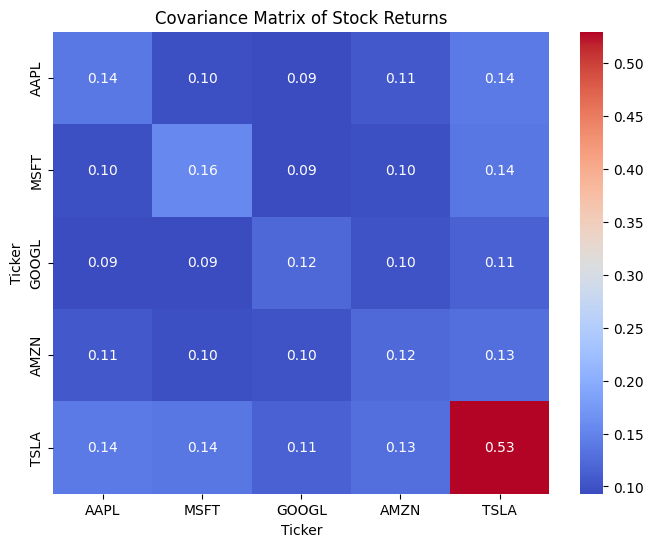

In [28]:
# Visualize the covariance matrix of returns
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix*256, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=tickers, yticklabels=tickers)
plt.title('Covariance Matrix of Stock Returns')
plt.show()

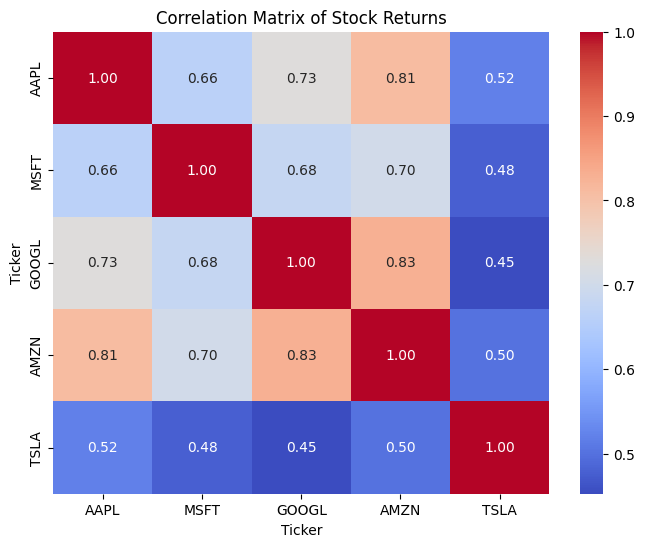

In [30]:
# Visualize the correlation matrix of returns
plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt='.2f', xticklabels=tickers, yticklabels=tickers)
plt.title('Correlation Matrix of Stock Returns')
plt.show()

In [32]:
# Function to calculate portfolio risk
def portfolio_risk(weights, cov_matrix):
    weights = np.array(weights)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return np.sqrt(portfolio_variance)

# Function to calculate portfolio returns
def portfolio_return(weights, mean_returns):
    weights = np.array(weights)
    return np.dot(weights, mean_returns)

In [34]:
# Calculate mean returns of each stock
mean_returns = returns.mean()

# Calculate cumulative returns for each portfolio, portfolio risks, and portfolio returns
cumulative_returns = {}
portfolio_risks = {}
portfolio_means = {}

In [40]:
for name, weights in portfolios.items():
    # Portfolio returns
    portfolio_returns = (returns * weights).sum(axis=1)
    cumulative_returns[name] = (1 + portfolio_returns).cumprod()
    
    # Portfolio risk
    portfolio_risks[name] = portfolio_risk(weights, cov_matrix)*np.sqrt(250)
    
    # Portfolio expected return
    portfolio_means[name] = portfolio_return(weights, mean_returns)*250

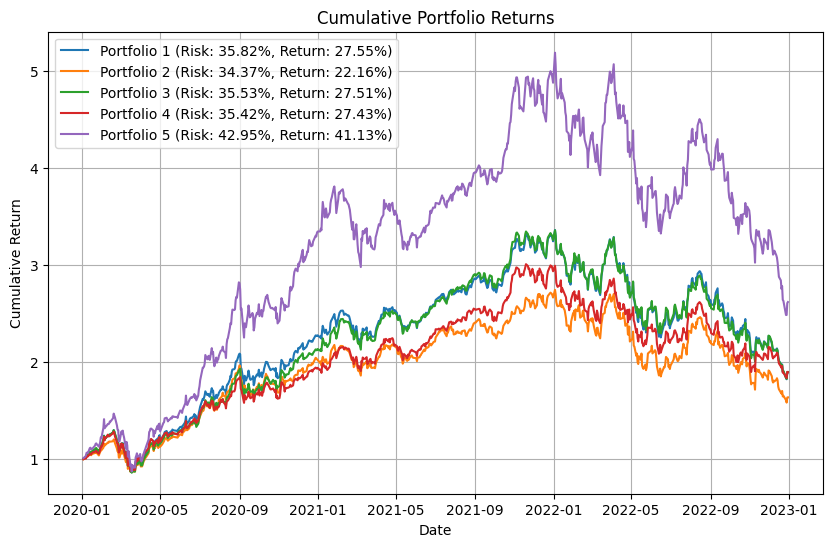

In [44]:
# Plot cumulative returns with risk and returns in the legend
plt.figure(figsize=(10, 6))
for name in cumulative_returns:
    plt.plot(cumulative_returns[name], label=f'{name} (Risk: {portfolio_risks[name]:.2%}, Return: {portfolio_means[name]:.2%})')

plt.title('Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()